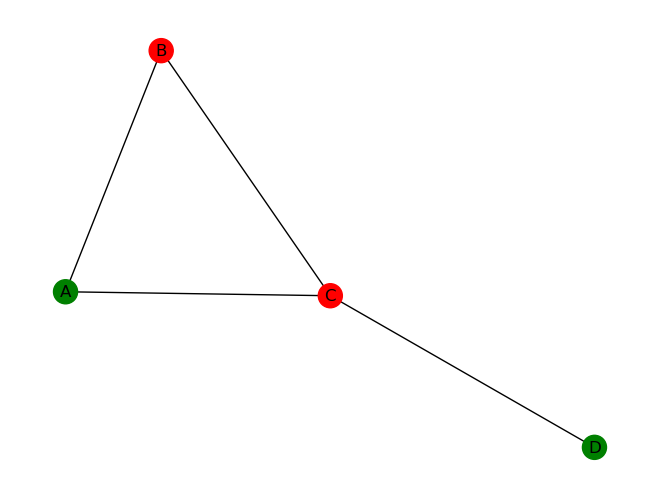

In [21]:
import graph_handler as gh
import fiduccia as fm
import networkx as nx
import metaheuristics as mh
import numpy as np
import bisect
MAX_COUNT = 10000
G1 = gh.createExampleGraph1()
gh.vizualize_graph(G1)

In [19]:
def hemming_distance(p1,p2):
    return sum([0 if p1[i]==p2[i] else 1 for i in range (0,len(p1))])

def invert_binary_list(p):
    return [0 if p[i]==1 else 1 for i in range(0,len(p))]

def uniformCrossover(p1,p2):
    hd=hemming_distance(p1,p2)
    if(hd>len(p1)//2):
        p2 = invert_binary_list(p2)
    balance = 0
    child = [-1]*len(p1)
    for i in range(0,len(p1)):
        if(abs(balance)>=len(p1)-i):
            ci = 0 if balance>0 else 1
            incr = 1 if balance<0 else -1
            child[i]=ci
            balance+=incr
        elif(p1[i]==p2[i]):
            child[i] = p1[i]
            incr = 1 if p1[i]==1 else -1
            balance+=incr
        else:
            apnd = np.random.choice([0,1])
            child[i]=1
            incr = 1 if apnd==1 else -1
            balance+=incr
    return child

assert(hemming_distance([1,1,1,1,1],[0,0,0,0,0])==5)
assert(hemming_distance([1,1,1,1,1],[1,1,1,1,1])==0)
assert(hemming_distance([1,1,1,1,1],[0,1,1,0,1])==2)
assert(invert_binary_list([1,1,1,1])==[0,0,0,0])
assert(invert_binary_list([1,1,0,0])==[0,0,1,1])

print(uniformCrossover([1,1,1,1],[0,0,0,0]))

assert(uniformCrossover([1,1,0,0],[1,1,0,0])==[1,1,0,0])
assert(uniformCrossover([1,1,1,1],[0,0,0,0])==[1,1,0,0]) #This is expected due to the equality constriction (the parents are invalid in this case)
assert(uniformCrossover([0,0,0,0],[1,1,1,1])==[0,0,1,1]) #This is expected due to the equality constriction (the parents are invalid in this case)


[1, 1, 0, 0]


In [20]:
"""
The specific genetic algorithm is an incremental (or steady state) GA where there is no
explicit notion of generations: each iteration two parents are randomly selected, use
uniform crossover to generate one child, do FM local search on the child, let this
optimized child compete with the worst solution in the population, if it is better or
equal it replaces the worst solution
"""


def geneticSearch(G:nx.Graph,population:int):
    res = []
    counter = 0
    #randomly initiate vertices in different colors
    pop=[mh.createRandomPartion(G) for i in range(0,population)]
    print(pop)
    pop.sort(key=gh.getCut)
    while (counter<MAX_COUNT):
        #randomly select two parents
        p1=np.random.randint(0,population)
        p2=p1
        while p2==p1: #makes sure parents are distinct
            p2=np.random.randint(0,population)
        child = uniformCrossover(population[p1],population[p2])
        
        


    #G, partion, cut = fiduccia.fm_search(G)

geneticSearch(G1,5) 

[['0', '1', '0', '1'], ['0', '1', '1', '0'], ['1', '0', '1', '0'], ['0', '1', '0', '1'], ['1', '0', '1', '0']]


TypeError: object of type 'int' has no len()